In [222]:
import pandas as pd
%matplotlib inline

Copy paste the time for time estimate

In [232]:
allAcceptedCaseDf=pd.read_csv('OPT_processing_time_from_trackkit.txt',header=None,sep='\t').dropna()

In [237]:
allAcceptedCaseDf.head()

,Received,Appproval time
0,2018-10-22,2019-01-07
1,2018-10-18,2019-01-04
2,2018-10-22,2018-12-26
3,2018-10-25,2019-01-10
4,2018-10-31,2019-01-10


### Estimated time

In [238]:
optStartTime="2018-12-03"
optStartTrackTime="2018-09-03" # 3 months ahead of submission

Text(0.5,0,'# of days from date received to approval notification')

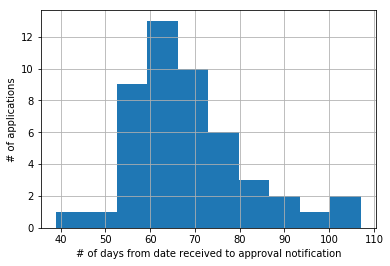

In [239]:
allAcceptedCaseDf.columns=['Received','Appproval time']
allAcceptedCaseDf=allAcceptedCaseDf.astype('datetime64')
baseTime=np.datetime64(optStartTrackTime)
acceptedCaseDf=allAcceptedCaseDf[allAcceptedCaseDf['Received']>=baseTime]

tmpS=(acceptedCaseDf['Appproval time']-acceptedCaseDf['Received'])
ax=(tmpS/pd.Timedelta('1 days')).hist()
ax.set_ylabel('# of applications')
ax.set_xlabel('# of days from date received to approval notification')

### distribution of time in data

(array([737073., 737087., 737101., 737115., 737129.]),
 <a list of 5 Text xticklabel objects>)

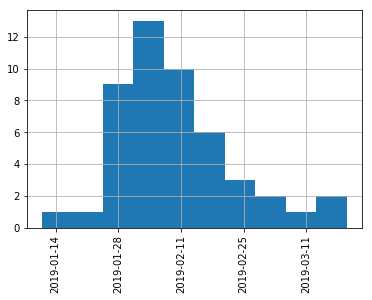

In [240]:
import numpy as np
optStartTime="2018-12-03"
baseTime=np.datetime64(optStartTime)
ax=(baseTime+(tmpS)).hist()
import matplotlib.pyplot as plt
plt.xticks(rotation=90)

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'When am I receiving OPT?')

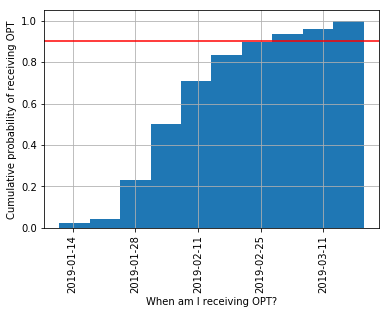

In [241]:
baseTime=np.datetime64(optStartTime)
ax=(baseTime+(tmpS)).hist(cumulative=True,normed=True)
plt.xticks(rotation=90)
ax.set_ylabel('Cumulative probability of receiving OPT')
ax.axhline(y=0.9,color='red')
ax.set_xlabel('When am I receiving OPT?')

### scratch